In [1]:
import torch
from torch import nn
import numpy as np

In [2]:
conv = nn.Conv2d(1, 64, 7, 2, bias=False)

In [3]:
m = torch.randn(1, 913, 480)

In [4]:
t = conv(m)

In [5]:
t.shape

torch.Size([64, 454, 237])

In [6]:
mp = nn.MaxPool2d(3, stride=2)

In [7]:
t2 = mp(t)

In [8]:
t2.shape

torch.Size([64, 226, 118])

In [9]:
import pdsp_resnet_pt

2023-02-17 16:11:39.998011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 16:11:40.165414: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-17 16:11:40.169670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 16:11:40.169686: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [10]:
stage2 = pdsp_resnet_pt.Stage2NBlock((226, 118), 64, 128)

In [11]:
t2 = t2.reshape(1, *t2.shape)

In [12]:
s2 = stage2(t2)

In [13]:
s2.shape

torch.Size([1, 128, 113, 59])

In [14]:
c1x1 = stage2.conv_1x1(t2)

In [15]:
c1x1.shape

torch.Size([1, 128, 113, 59])

In [16]:
stage2_same = pdsp_resnet_pt.Stage2NBlock((226, 118), 64, 64)

In [17]:
s2s = stage2_same(t2)

In [18]:
s2s.shape

torch.Size([1, 64, 226, 118])

In [19]:
t2.shape

torch.Size([1, 64, 226, 118])

In [20]:
pool = nn.AvgPool2d((226,118))

In [21]:
pool(t2).shape

torch.Size([1, 64, 1, 1])

In [22]:
f = nn.Flatten()(pool(t2))

In [23]:
f.shape


torch.Size([1, 64])

In [24]:
seblock = pdsp_resnet_pt.SEBlock((226, 118), 64, 16)

In [25]:
seb2 = seblock(t2)

In [26]:
seb2.shape

torch.Size([1, 64, 226, 118])

In [27]:
#ones = torch.ones((1,64,4,4))

In [28]:
#(seb2.reshape((1,64, 1, 1)) * ones)[0][1]

In [29]:
t2.shape

torch.Size([1, 64, 226, 118])

In [30]:
block_2 = pdsp_resnet_pt.NBlock(3, (226, 118), 64, 64)

In [31]:
b2 = block_2(t2)

In [32]:
b2.shape

torch.Size([1, 64, 226, 118])

In [33]:
block_3 = pdsp_resnet_pt.NBlock(3, (226, 118), 64, 128)

In [34]:
b3 = block_3(b2)

In [35]:
b3.shape

torch.Size([1, 128, 113, 59])

In [36]:
nf = [1,1,2]

In [37]:
a = [1, *nf]

In [38]:
a

[1, 1, 1, 2]

In [39]:
m.shape

torch.Size([1, 913, 480])

In [40]:
# pdsp_res = pdsp_resnet_pt.SEResnetPDSP(ntimes=500)

In [41]:
m = m.reshape((1, *m.shape))

In [42]:
m.shape

torch.Size([1, 1, 913, 480])

In [43]:
# pdsp_res.stage3n_shapes[0]

In [44]:
import matplotlib.pyplot as plt, matplotlib

In [45]:
import process_hits

In [46]:
pdsp_data = process_hits.PDSPData('pdsp_hits.h5')

In [47]:
plane = pdsp_data.make_plane(2)

In [48]:
matplotlib.rcParams['figure.figsize'] = [10, 20]

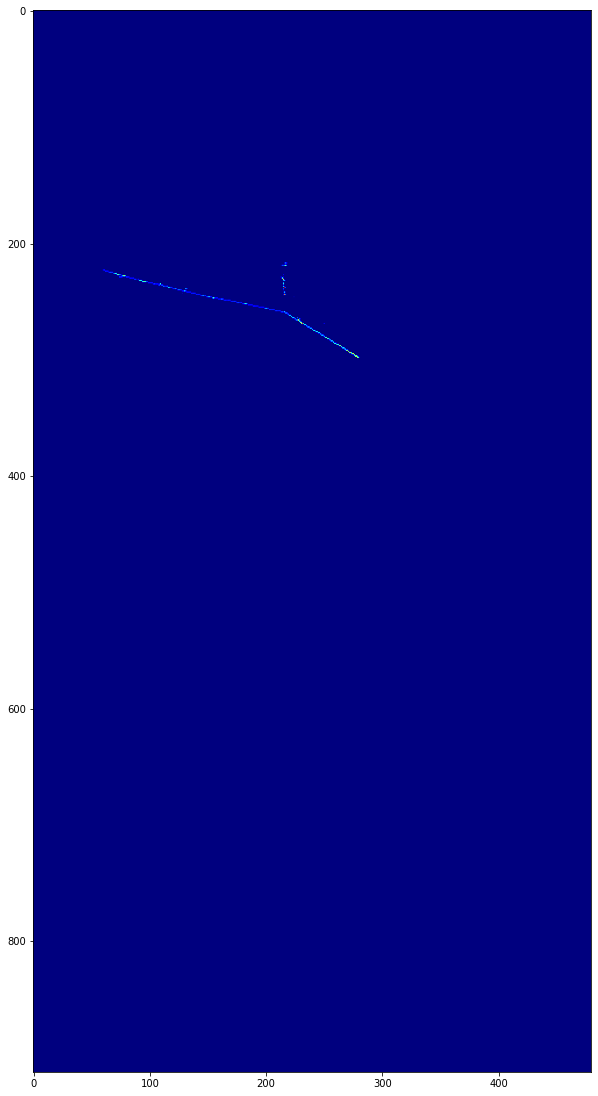

In [49]:
plt.imshow(plane, cmap='jet')

In [50]:
import math
math.cos(10*math.pi/180.)

0.984807753012208

In [51]:
#plt.imshow(out1[0][0])

In [52]:
loss_fn = nn.CrossEntropyLoss()

In [53]:
# optimizer = torch.optim.SGD(pdsp_res.parameters(), lr=0.01, momentum=0.9)

In [54]:
pd_data = process_hits.PDSPData('save_hits/2_8_23/linked.h5', maxtime=500, linked=True)

Added 7 events from link0
Added 9 events from link1
Added 7 events from link10
Added 4 events from link100
Added 5 events from link1000
Added 6 events from link10000
Added 5 events from link10001
Added 4 events from link10002
Added 5 events from link10003
Added 3 events from link10004
Added 6 events from link10005
Added 6 events from link10006
Added 6 events from link10007
Added 5 events from link10008
Added 5 events from link10009
Added 7 events from link1001
Added 7 events from link10010
Added 8 events from link10011
Added 6 events from link10012
Added 5 events from link10013
Added 6 events from link10014
Added 6 events from link10015
Added 6 events from link10016
Added 3 events from link10017
Added 4 events from link10018
Added 4 events from link10019
Added 5 events from link1002
Added 7 events from link10020
Added 1 events from link10021
Added 4 events from link10022
Added 6 events from link10023
Added 6 events from link10024
Added 5 events from link10025
Added 6 events from link10

Added 5 events from link10255
Added 5 events from link10256
Added 7 events from link10257
Added 4 events from link10258
Added 4 events from link10259
Added 6 events from link1026
Added 6 events from link10260
Added 5 events from link10261
Added 4 events from link10262
Added 6 events from link10263
Added 5 events from link10264
Added 6 events from link10265
Added 2 events from link10266
Added 6 events from link10267
Added 8 events from link10268
Added 7 events from link10269
Added 6 events from link1027
Added 6 events from link10270
Added 5 events from link10271
Added 6 events from link10272
Added 4 events from link10273
Added 4 events from link10274
Added 7 events from link10275
Added 6 events from link10276
Added 5 events from link10277
Added 4 events from link10278
Added 7 events from link10279
Added 5 events from link1028
Added 5 events from link10280
Added 5 events from link10281
Added 6 events from link10282
Added 7 events from link10283
Added 5 events from link10284
Added 6 event

Added 5 events from link10517
Added 3 events from link10518
Added 7 events from link10519
Added 6 events from link1052
Added 5 events from link10520
Added 8 events from link10521
Added 6 events from link10522
Added 8 events from link10523
Added 6 events from link10524
Added 6 events from link10525
Added 4 events from link10526
Added 5 events from link10527
Added 3 events from link10528
Added 7 events from link10529
Added 2 events from link1053
Added 3 events from link10530
Added 4 events from link10531
Added 6 events from link10532
Added 5 events from link10533
Added 6 events from link10534
Added 4 events from link10535
Added 7 events from link10536
Added 5 events from link10537
Added 4 events from link10538
Added 5 events from link10539
Added 4 events from link1054
Added 5 events from link10540
Added 4 events from link10541
Added 6 events from link10542
Added 3 events from link10543
Added 7 events from link10544
Added 7 events from link10545
Added 2 events from link10546
Added 9 event

Added 6 events from link1077
Added 5 events from link10770
Added 5 events from link10771
Added 4 events from link10772
Added 5 events from link10773
Added 5 events from link10774
Added 3 events from link10775
Added 7 events from link10776
Added 8 events from link10777
Added 4 events from link10778
Added 7 events from link10779
Added 4 events from link1078
Added 7 events from link10780
Added 5 events from link10781
Added 5 events from link10782
Added 7 events from link10783
Added 7 events from link10784
Added 9 events from link10785
Added 8 events from link10786
Added 5 events from link10787
Added 7 events from link10788
Added 8 events from link10789
Added 5 events from link1079
Added 5 events from link10790
Added 4 events from link10791
Added 8 events from link10792
Added 8 events from link10793
Added 7 events from link10794
Added 4 events from link10795
Added 7 events from link10796
Added 5 events from link10797
Added 7 events from link10798
Added 7 events from link10799
Added 7 event

Added 5 events from link11021
Added 9 events from link11022
Added 6 events from link11023
Added 6 events from link11024
Added 5 events from link11025
Added 6 events from link11026
Added 6 events from link11027
Added 6 events from link11028
Added 6 events from link11029
Added 8 events from link1103
Added 8 events from link11030
Added 6 events from link11031
Added 5 events from link11032
Added 2 events from link11033
Added 5 events from link11034
Added 6 events from link11035
Added 5 events from link11036
Added 6 events from link11037
Added 6 events from link11038
Added 3 events from link11039
Added 7 events from link1104
Added 7 events from link11040
Added 7 events from link11041
Added 4 events from link11042
Added 6 events from link11043
Added 5 events from link11044
Added 5 events from link11045
Added 4 events from link11046
Added 4 events from link11047
Added 5 events from link11048
Added 6 events from link11049
Added 5 events from link1105
Added 6 events from link11050
Added 5 event

Added 5 events from link1128
Added 3 events from link11280
Added 6 events from link11281
Added 8 events from link11282
Added 5 events from link11283
Added 6 events from link11284
Added 5 events from link11285
Added 4 events from link11286
Added 5 events from link11287
Added 6 events from link11288
Added 6 events from link11289
Added 5 events from link1129
Added 5 events from link11290
Added 4 events from link11291
Added 4 events from link11292
Added 6 events from link11293
Added 4 events from link11294
Added 3 events from link11295
Added 6 events from link11296
Added 5 events from link11297
Added 4 events from link11298
Added 6 events from link11299
Added 6 events from link113
Added 6 events from link1130
Added 6 events from link11300
Added 7 events from link11301
Added 5 events from link11302
Added 5 events from link11303
Added 5 events from link11304
Added 4 events from link11305
Added 6 events from link11306
Added 6 events from link11307
Added 4 events from link11308
Added 9 events 

Added 3 events from link11540
Added 6 events from link11541
Added 7 events from link11542
Added 8 events from link11543
Added 4 events from link11544
Added 9 events from link11545
Added 3 events from link11546
Added 5 events from link11547
Added 5 events from link11548
Added 6 events from link11549
Added 3 events from link1155
Added 5 events from link11550
Added 7 events from link11551
Added 7 events from link11552
Added 4 events from link11553
Added 6 events from link11554
Added 6 events from link11555
Added 5 events from link11556
Added 6 events from link11557
Added 6 events from link11558
Added 6 events from link11559
Added 5 events from link1156
Added 6 events from link11560
Added 7 events from link11561
Added 6 events from link11562
Added 7 events from link11563
Added 6 events from link11564
Added 6 events from link11565
Added 6 events from link11566
Added 4 events from link11567
Added 4 events from link11568
Added 2 events from link11569
Added 3 events from link1157
Added 4 event

Added 6 events from link118
Added 5 events from link1180
Added 5 events from link11800
Added 5 events from link11801
Added 5 events from link11802
Added 7 events from link11803
Added 6 events from link11804
Added 7 events from link11805
Added 5 events from link11806
Added 6 events from link11807
Added 5 events from link11808
Added 6 events from link11809
Added 3 events from link1181
Added 6 events from link11810
Added 5 events from link11811
Added 7 events from link11812
Added 3 events from link11813
Added 4 events from link11814
Added 5 events from link11815
Added 5 events from link11816
Added 7 events from link11817
Added 7 events from link11818
Added 4 events from link11819
Added 6 events from link1182
Added 4 events from link11820
Added 7 events from link11821
Added 2 events from link11822
Added 8 events from link11823
Added 3 events from link11824
Added 6 events from link11825
Added 7 events from link11826
Added 5 events from link11827
Added 5 events from link11828
Added 4 events 

Added 4 events from link12055
Added 7 events from link12056
Added 5 events from link12057
Added 7 events from link12058
Added 7 events from link12059
Added 5 events from link1206
Added 4 events from link12060
Added 8 events from link12061
Added 5 events from link12062
Added 5 events from link12063
Added 7 events from link12064
Added 8 events from link12065
Added 7 events from link12066
Added 4 events from link12067
Added 4 events from link12068
Added 5 events from link12069
Added 2 events from link1207
Added 4 events from link12070
Added 4 events from link12071
Added 3 events from link12072
Added 6 events from link12073
Added 6 events from link12074
Added 7 events from link12075
Added 7 events from link12076
Added 3 events from link12077
Added 5 events from link12078
Added 4 events from link12079
Added 7 events from link1208
Added 6 events from link12080
Added 4 events from link12081
Added 6 events from link12082
Added 4 events from link12083
Added 5 events from link12084
Added 7 event

Added 4 events from link12310
Added 4 events from link12311
Added 5 events from link12312
Added 6 events from link12313
Added 5 events from link12314
Added 6 events from link12315
Added 2 events from link12316
Added 3 events from link12317
Added 5 events from link12318
Added 5 events from link12319
Added 4 events from link1232
Added 8 events from link12320
Added 5 events from link12321
Added 6 events from link12322
Added 5 events from link12323
Added 4 events from link12324
Added 3 events from link12325
Added 4 events from link12326
Added 7 events from link12327
Added 5 events from link12328
Added 7 events from link12329
Added 7 events from link1233
Added 3 events from link12330
Added 6 events from link12331
Added 9 events from link12332
Added 3 events from link12333
Added 7 events from link12334
Added 7 events from link12335
Added 4 events from link12336
Added 6 events from link12337
Added 2 events from link12338
Added 5 events from link12339
Added 9 events from link1234
Added 4 event

Added 4 events from link1257
Added 5 events from link12570
Added 6 events from link12571
Added 7 events from link12572
Added 3 events from link12573
Added 5 events from link12574
Added 7 events from link12575
Added 7 events from link12576
Added 5 events from link12577
Added 6 events from link12578
Added 4 events from link12579
Added 1 events from link1258
Added 5 events from link12580
Added 3 events from link12581
Added 7 events from link12582
Added 4 events from link12583
Added 6 events from link12584
Added 4 events from link12585
Added 5 events from link12586
Added 5 events from link12587
Added 5 events from link12588
Added 5 events from link12589
Added 7 events from link1259
Added 8 events from link12590
Added 7 events from link12591
Added 9 events from link12592
Added 6 events from link12593
Added 8 events from link12594
Added 7 events from link12595
Added 3 events from link12596
Added 6 events from link12597
Added 7 events from link12598
Added 6 events from link12599
Added 7 event

Added 5 events from link1460
Added 3 events from link1461
Added 7 events from link1462
Added 7 events from link1463
Added 8 events from link1464
Added 7 events from link1465
Added 5 events from link1466
Added 7 events from link1467
Added 7 events from link1468
Added 8 events from link1469
Added 8 events from link147
Added 5 events from link1470
Added 8 events from link1471
Added 7 events from link1472
Added 3 events from link1473
Added 5 events from link1474
Added 4 events from link1475
Added 5 events from link1476
Added 6 events from link1477
Added 6 events from link1478
Added 6 events from link1479
Added 6 events from link148
Added 6 events from link1480
Added 8 events from link1481
Added 1 events from link1482
Added 5 events from link1483
Added 2 events from link1484
Added 5 events from link1485
Added 9 events from link1486
Added 6 events from link1487
Added 4 events from link1488
Added 5 events from link1489
Added 4 events from link149
Added 7 events from link1490
Added 6 events fr

Added 5 events from link178
Added 3 events from link1780
Added 6 events from link1781
Added 7 events from link1782
Added 7 events from link1783
Added 6 events from link1784
Added 6 events from link1785
Added 6 events from link1786
Added 9 events from link1787
Added 6 events from link1788
Added 7 events from link1789
Added 4 events from link179
Added 6 events from link1790
Added 8 events from link1791
Added 7 events from link1792
Added 1 events from link1793
Added 6 events from link1794
Added 4 events from link1795
Added 5 events from link1796
Added 9 events from link1797
Added 8 events from link1798
Added 3 events from link1799
Added 8 events from link18
Added 6 events from link180
Added 5 events from link1800
Added 5 events from link1801
Added 4 events from link1802
Added 7 events from link1803
Added 8 events from link1804
Added 5 events from link1805
Added 9 events from link1806
Added 2 events from link1807
Added 3 events from link1808
Added 7 events from link1809
Added 5 events from

Added 4 events from link2113
Added 5 events from link2114
Added 4 events from link2115
Added 5 events from link2116
Added 5 events from link2117
Added 5 events from link2118
Added 5 events from link2119
Added 5 events from link212
Added 8 events from link2120
Added 5 events from link2121
Added 4 events from link2122
Added 3 events from link2123
Added 7 events from link2124
Added 6 events from link2125
Added 8 events from link2126
Added 5 events from link2127
Added 7 events from link2128
Added 5 events from link2129
Added 4 events from link213
Added 6 events from link2130
Added 7 events from link2131
Added 4 events from link2132
Added 5 events from link2133
Added 7 events from link2134
Added 7 events from link2135
Added 4 events from link2136
Added 7 events from link2137
Added 2 events from link2138
Added 5 events from link2139
Added 6 events from link214
Added 6 events from link2140
Added 5 events from link2141
Added 5 events from link2142
Added 8 events from link2143
Added 4 events fr

Added 7 events from link2416
Added 5 events from link2417
Added 5 events from link2418
Added 4 events from link2419
Added 6 events from link242
Added 4 events from link2420
Added 6 events from link2421
Added 1 events from link2422
Added 5 events from link2423
Added 5 events from link2424
Added 5 events from link2425
Added 5 events from link2426
Added 3 events from link2427
Added 6 events from link2428
Added 7 events from link2429
Added 7 events from link243
Added 8 events from link2430
Added 5 events from link2431
Added 6 events from link2432
Added 6 events from link2433
Added 6 events from link2434
Added 6 events from link2435
Added 4 events from link2436
Added 7 events from link2437
Added 7 events from link2438
Added 4 events from link2439
Added 8 events from link244
Added 7 events from link2440
Added 4 events from link2441
Added 4 events from link2442
Added 4 events from link2443
Added 6 events from link2444
Added 8 events from link2445
Added 4 events from link2446
Added 5 events fr

Added 5 events from link2723
Added 0 events from link2724
Added 8 events from link2725
Added 2 events from link2726
Added 5 events from link2727
Added 4 events from link2728
Added 5 events from link2729
Added 8 events from link273
Added 5 events from link2730
Added 5 events from link2731
Added 7 events from link2732
Added 7 events from link2733
Added 7 events from link2734
Added 6 events from link2735
Added 5 events from link2736
Added 6 events from link2737
Added 8 events from link2738
Added 4 events from link2739
Added 7 events from link274
Added 5 events from link2740
Added 7 events from link2741
Added 9 events from link2742
Added 5 events from link2743
Added 5 events from link2744
Added 7 events from link2745
Added 6 events from link2746
Added 2 events from link2747
Added 3 events from link2748
Added 7 events from link2749
Added 5 events from link275
Added 3 events from link2750
Added 5 events from link2751
Added 6 events from link2752
Added 8 events from link2753
Added 6 events fr

Added 7 events from link3022
Added 6 events from link3023
Added 8 events from link3024
Added 7 events from link3025
Added 8 events from link3026
Added 4 events from link3027
Added 4 events from link3028
Added 6 events from link3029
Added 7 events from link303
Added 4 events from link3030
Added 8 events from link3031
Added 5 events from link3032
Added 6 events from link3033
Added 5 events from link3034
Added 7 events from link3035
Added 8 events from link3036
Added 6 events from link3037
Added 8 events from link3038
Added 6 events from link3039
Added 4 events from link304
Added 6 events from link3040
Added 6 events from link3041
Added 8 events from link3042
Added 6 events from link3043
Added 6 events from link3044
Added 6 events from link3045
Added 4 events from link3046
Added 1 events from link3047
Added 3 events from link3048
Added 7 events from link3049
Added 3 events from link305
Added 5 events from link3050
Added 8 events from link3051
Added 7 events from link3052
Added 6 events fr

Added 5 events from link3350
Added 5 events from link3351
Added 6 events from link3352
Added 5 events from link3353
Added 6 events from link3354
Added 9 events from link3355
Added 7 events from link3356
Added 7 events from link3357
Added 7 events from link3358
Added 6 events from link3359
Added 6 events from link336
Added 9 events from link3360
Added 4 events from link3361
Added 5 events from link3362
Added 8 events from link3363
Added 8 events from link3364
Added 5 events from link3365
Added 1 events from link3366
Added 4 events from link3367
Added 6 events from link3368
Added 3 events from link3369
Added 6 events from link337
Added 6 events from link3370
Added 5 events from link3371
Added 6 events from link3372
Added 5 events from link3373
Added 5 events from link3374
Added 4 events from link3375
Added 3 events from link3376
Added 4 events from link3377
Added 5 events from link3378
Added 7 events from link3379
Added 3 events from link338
Added 4 events from link3380
Added 3 events fr

Added 5 events from link3655
Added 7 events from link3656
Added 7 events from link3657
Added 6 events from link3658
Added 7 events from link3659
Added 8 events from link366
Added 5 events from link3660
Added 4 events from link3661
Added 7 events from link3662
Added 4 events from link3663
Added 7 events from link3664
Added 8 events from link3665
Added 5 events from link3666
Added 6 events from link3667
Added 5 events from link3668
Added 3 events from link3669
Added 7 events from link367
Added 5 events from link3670
Added 7 events from link3671
Added 7 events from link3672
Added 5 events from link3673
Added 5 events from link3674
Added 6 events from link3675
Added 7 events from link3676
Added 5 events from link3677
Added 7 events from link3678
Added 8 events from link3679
Added 5 events from link368
Added 6 events from link3680
Added 5 events from link3681
Added 6 events from link3682
Added 5 events from link3683
Added 5 events from link3684
Added 5 events from link3685
Added 3 events fr

Added 5 events from link3974
Added 6 events from link3975
Added 8 events from link3976
Added 5 events from link3977
Added 7 events from link3978
Added 7 events from link3979
Added 2 events from link398
Added 5 events from link3980
Added 4 events from link3981
Added 4 events from link3982
Added 5 events from link3983
Added 6 events from link3984
Added 5 events from link3985
Added 6 events from link3986
Added 6 events from link3987
Added 2 events from link3988
Added 6 events from link3989
Added 8 events from link399
Added 4 events from link3990
Added 5 events from link3991
Added 7 events from link3992
Added 5 events from link3993
Added 7 events from link3994
Added 6 events from link3995
Added 7 events from link3996
Added 5 events from link3997
Added 4 events from link3998
Added 5 events from link3999
Added 4 events from link4
Added 9 events from link40
Added 7 events from link400
Added 6 events from link4000
Added 3 events from link4001
Added 5 events from link4002
Added 3 events from li

Added 7 events from link4310
Added 3 events from link4311
Added 5 events from link4312
Added 6 events from link4313
Added 6 events from link4314
Added 6 events from link4315
Added 4 events from link4316
Added 3 events from link4317
Added 7 events from link4318
Added 7 events from link4319
Added 7 events from link432
Added 4 events from link4320
Added 3 events from link4321
Added 5 events from link4322
Added 5 events from link4323
Added 7 events from link4324
Added 8 events from link4325
Added 7 events from link4326
Added 3 events from link4327
Added 6 events from link4328
Added 6 events from link4329
Added 4 events from link433
Added 6 events from link4330
Added 2 events from link4331
Added 6 events from link4332
Added 4 events from link4333
Added 6 events from link4334
Added 5 events from link4335
Added 8 events from link4336
Added 6 events from link4337
Added 2 events from link4338
Added 4 events from link4339
Added 6 events from link434
Added 8 events from link4340
Added 6 events fr

Added 5 events from link464
Added 8 events from link4640
Added 5 events from link4641
Added 5 events from link4642
Added 5 events from link4643
Added 4 events from link4644
Added 10 events from link4645
Added 7 events from link4646
Added 10 events from link4647
Added 5 events from link4648
Added 5 events from link4649
Added 4 events from link465
Added 6 events from link4650
Added 4 events from link4651
Added 5 events from link4652
Added 5 events from link4653
Added 6 events from link4654
Added 4 events from link4655
Added 8 events from link4656
Added 5 events from link4657
Added 8 events from link4658
Added 4 events from link4659
Added 7 events from link466
Added 4 events from link4660
Added 5 events from link4661
Added 5 events from link4662
Added 5 events from link4663
Added 7 events from link4664
Added 4 events from link4665
Added 8 events from link4666
Added 4 events from link4667
Added 5 events from link4668
Added 4 events from link4669
Added 5 events from link467
Added 5 events f

Added 6 events from link4963
Added 7 events from link4964
Added 4 events from link4965
Added 4 events from link4966
Added 5 events from link4967
Added 5 events from link4968
Added 5 events from link4969
Added 8 events from link497
Added 9 events from link4970
Added 8 events from link4971
Added 7 events from link4972
Added 3 events from link4973
Added 7 events from link4974
Added 5 events from link4975
Added 4 events from link4976
Added 6 events from link4977
Added 9 events from link4978
Added 4 events from link4979
Added 5 events from link498
Added 6 events from link4980
Added 6 events from link4981
Added 4 events from link4982
Added 6 events from link4983
Added 4 events from link4984
Added 7 events from link4985
Added 5 events from link4986
Added 6 events from link4987
Added 6 events from link4988
Added 4 events from link4989
Added 4 events from link499
Added 5 events from link4990
Added 7 events from link4991
Added 4 events from link4992
Added 5 events from link4993
Added 5 events fr

Added 5 events from link5271
Added 4 events from link5272
Added 7 events from link5273
Added 3 events from link5274
Added 8 events from link5275
Added 5 events from link5276
Added 5 events from link5277
Added 6 events from link5278
Added 5 events from link5279
Added 8 events from link528
Added 6 events from link5280
Added 6 events from link5281
Added 6 events from link5282
Added 8 events from link5283
Added 7 events from link5284
Added 4 events from link5285
Added 3 events from link5286
Added 8 events from link5287
Added 8 events from link5288
Added 6 events from link5289
Added 3 events from link529
Added 6 events from link5290
Added 6 events from link5291
Added 4 events from link5292
Added 8 events from link5293
Added 7 events from link5294
Added 7 events from link5295
Added 5 events from link5296
Added 5 events from link5297
Added 5 events from link5298
Added 5 events from link5299
Added 6 events from link53
Added 5 events from link530
Added 4 events from link5300
Added 4 events from

Added 4 events from link5591
Added 7 events from link5592
Added 5 events from link5593
Added 5 events from link5594
Added 5 events from link5595
Added 5 events from link5596
Added 4 events from link5597
Added 3 events from link5598
Added 5 events from link5599
Added 7 events from link56
Added 7 events from link560
Added 3 events from link5600
Added 6 events from link5601
Added 7 events from link5602
Added 5 events from link5603
Added 5 events from link5604
Added 4 events from link5605
Added 6 events from link5606
Added 7 events from link5607
Added 7 events from link5608
Added 7 events from link5609
Added 5 events from link561
Added 7 events from link5610
Added 6 events from link5611
Added 7 events from link5612
Added 3 events from link5613
Added 5 events from link5614
Added 6 events from link5615
Added 4 events from link5616
Added 5 events from link5617
Added 5 events from link5618
Added 8 events from link5619
Added 6 events from link562
Added 5 events from link5620
Added 7 events from

Added 5 events from link5928
Added 3 events from link5929
Added 7 events from link593
Added 4 events from link5930
Added 7 events from link5931
Added 8 events from link5932
Added 8 events from link5933
Added 6 events from link5934
Added 6 events from link5935
Added 8 events from link5936
Added 8 events from link5937
Added 6 events from link5938
Added 7 events from link5939
Added 6 events from link594
Added 8 events from link5940
Added 8 events from link5941
Added 4 events from link5942
Added 5 events from link5943
Added 6 events from link5944
Added 5 events from link5945
Added 3 events from link5946
Added 9 events from link5947
Added 6 events from link5948
Added 4 events from link5949
Added 6 events from link595
Added 5 events from link5950
Added 7 events from link5951
Added 5 events from link5952
Added 6 events from link5953
Added 6 events from link5954
Added 8 events from link5955
Added 6 events from link5956
Added 6 events from link5957
Added 4 events from link5958
Added 7 events fr

Added 7 events from link6184
Added 5 events from link6185
Added 5 events from link6186
Added 4 events from link6187
Added 5 events from link6188
Added 6 events from link6189
Added 7 events from link619
Added 7 events from link6190
Added 8 events from link6191
Added 7 events from link6192
Added 4 events from link6193
Added 4 events from link6194
Added 4 events from link6195
Added 6 events from link6196
Added 6 events from link6197
Added 6 events from link6198
Added 5 events from link6199
Added 7 events from link62
Added 2 events from link620
Added 4 events from link6200
Added 3 events from link6201
Added 6 events from link6202
Added 7 events from link6203
Added 3 events from link6204
Added 4 events from link6205
Added 5 events from link6206
Added 9 events from link6207
Added 5 events from link6208
Added 4 events from link6209
Added 7 events from link621
Added 4 events from link6210
Added 7 events from link6211
Added 6 events from link6212
Added 8 events from link6213
Added 3 events from

Added 5 events from link6511
Added 5 events from link6512
Added 6 events from link6513
Added 6 events from link6514
Added 6 events from link6515
Added 6 events from link6516
Added 5 events from link6517
Added 8 events from link6518
Added 7 events from link6519
Added 7 events from link652
Added 5 events from link6520
Added 6 events from link6521
Added 6 events from link6522
Added 6 events from link6523
Added 5 events from link6524
Added 4 events from link6525
Added 8 events from link6526
Added 4 events from link6527
Added 5 events from link6528
Added 5 events from link6529
Added 6 events from link653
Added 5 events from link6530
Added 6 events from link6531
Added 6 events from link6532
Added 4 events from link6533
Added 6 events from link6534
Added 3 events from link6535
Added 6 events from link6536
Added 1 events from link6537
Added 7 events from link6538
Added 5 events from link6539
Added 7 events from link654
Added 6 events from link6540
Added 5 events from link6541
Added 8 events fr

Added 4 events from link6829
Added 6 events from link683
Added 7 events from link6830
Added 10 events from link6831
Added 8 events from link6832
Added 3 events from link6833
Added 6 events from link6834
Added 7 events from link6835
Added 8 events from link6836
Added 6 events from link6837
Added 8 events from link6838
Added 5 events from link6839
Added 7 events from link684
Added 3 events from link6840
Added 7 events from link6841
Added 8 events from link6842
Added 6 events from link6843
Added 7 events from link6844
Added 5 events from link6845
Added 7 events from link6846
Added 5 events from link6847
Added 8 events from link6848
Added 4 events from link6849
Added 3 events from link685
Added 4 events from link6850
Added 2 events from link6851
Added 8 events from link6852
Added 5 events from link6853
Added 6 events from link6854
Added 7 events from link6855
Added 8 events from link6856
Added 6 events from link6857
Added 6 events from link6858
Added 8 events from link6859
Added 4 events f

Added 6 events from link7102
Added 5 events from link7103
Added 3 events from link7104
Added 7 events from link7105
Added 5 events from link7106
Added 6 events from link7107
Added 7 events from link7108
Added 9 events from link7109
Added 5 events from link711
Added 9 events from link7110
Added 4 events from link7111
Added 4 events from link7112
Added 8 events from link7113
Added 5 events from link7114
Added 6 events from link7115
Added 6 events from link7116
Added 4 events from link7117
Added 8 events from link7118
Added 7 events from link7119
Added 6 events from link712
Added 5 events from link7120
Added 4 events from link7121
Added 5 events from link7122
Added 6 events from link7123
Added 5 events from link7124
Added 6 events from link7125
Added 5 events from link7126
Added 7 events from link7127
Added 5 events from link7128
Added 5 events from link7129
Added 4 events from link713
Added 6 events from link7130
Added 7 events from link7131
Added 6 events from link7132
Added 6 events fr

Added 7 events from link7411
Added 5 events from link7412
Added 6 events from link7413
Added 4 events from link7414
Added 3 events from link7415
Added 7 events from link7416
Added 5 events from link7417
Added 3 events from link7418
Added 6 events from link7419
Added 3 events from link742
Added 7 events from link7420
Added 3 events from link7421
Added 5 events from link7422
Added 7 events from link7423
Added 7 events from link7424
Added 6 events from link7425
Added 6 events from link7426
Added 1 events from link7427
Added 5 events from link7428
Added 5 events from link7429
Added 7 events from link743
Added 8 events from link7430
Added 4 events from link7431
Added 5 events from link7432
Added 5 events from link7433
Added 4 events from link7434
Added 3 events from link7435
Added 5 events from link7436
Added 6 events from link7437
Added 6 events from link7438
Added 5 events from link7439
Added 5 events from link744
Added 7 events from link7440
Added 8 events from link7441
Added 4 events fr

Added 5 events from link7705
Added 4 events from link7706
Added 6 events from link7707
Added 7 events from link7708
Added 8 events from link7709
Added 6 events from link771
Added 7 events from link7710
Added 7 events from link7711
Added 7 events from link7712
Added 5 events from link7713
Added 8 events from link7714
Added 4 events from link7715
Added 5 events from link7716
Added 4 events from link7717
Added 6 events from link7718
Added 4 events from link7719
Added 8 events from link772
Added 5 events from link7720
Added 6 events from link7721
Added 6 events from link7722
Added 8 events from link7723
Added 7 events from link7724
Added 6 events from link7725
Added 4 events from link7726
Added 10 events from link7727
Added 7 events from link7728
Added 5 events from link7729
Added 4 events from link773
Added 5 events from link7730
Added 5 events from link7731
Added 5 events from link7732
Added 5 events from link7733
Added 6 events from link7734
Added 4 events from link7735
Added 8 events f

Added 6 events from link7982
Added 5 events from link7983
Added 7 events from link7984
Added 5 events from link7985
Added 5 events from link7986
Added 4 events from link7987
Added 4 events from link7988
Added 7 events from link7989
Added 8 events from link799
Added 6 events from link7990
Added 6 events from link7991
Added 5 events from link7992
Added 5 events from link7993
Added 4 events from link7994
Added 2 events from link7995
Added 3 events from link7996
Added 7 events from link7997
Added 9 events from link7998
Added 6 events from link7999
Added 6 events from link8
Added 7 events from link80
Added 5 events from link800
Added 3 events from link8000
Added 7 events from link8001
Added 6 events from link8002
Added 5 events from link8003
Added 7 events from link8004
Added 3 events from link8005
Added 7 events from link8006
Added 7 events from link8007
Added 4 events from link8008
Added 5 events from link8009
Added 7 events from link801
Added 9 events from link8010
Added 8 events from li

Added 4 events from link8273
Added 5 events from link8274
Added 6 events from link8275
Added 7 events from link8276
Added 4 events from link8277
Added 4 events from link8278
Added 8 events from link8279
Added 3 events from link828
Added 8 events from link8280
Added 4 events from link8281
Added 5 events from link8282
Added 6 events from link8283
Added 4 events from link8284
Added 5 events from link8285
Added 4 events from link8286
Added 7 events from link8287
Added 7 events from link8288
Added 5 events from link8289
Added 6 events from link829
Added 4 events from link8290
Added 3 events from link8291
Added 3 events from link8292
Added 2 events from link8293
Added 8 events from link8294
Added 5 events from link8295
Added 6 events from link8296
Added 3 events from link8297
Added 5 events from link8298
Added 8 events from link8299
Added 7 events from link83
Added 7 events from link830
Added 6 events from link8300
Added 6 events from link8301
Added 6 events from link8302
Added 6 events from

Added 5 events from link8572
Added 5 events from link8573
Added 7 events from link8574
Added 5 events from link8575
Added 6 events from link8576
Added 3 events from link8577
Added 5 events from link8578
Added 6 events from link8579
Added 9 events from link858
Added 5 events from link8580
Added 6 events from link8581
Added 5 events from link8582
Added 2 events from link8583
Added 6 events from link8584
Added 4 events from link8585
Added 4 events from link8586
Added 7 events from link8587
Added 5 events from link8588
Added 7 events from link8589
Added 6 events from link859
Added 3 events from link8590
Added 4 events from link8591
Added 3 events from link8592
Added 4 events from link8593
Added 8 events from link8594
Added 6 events from link8595
Added 5 events from link8596
Added 4 events from link8597
Added 7 events from link8598
Added 6 events from link8599
Added 4 events from link86
Added 5 events from link860
Added 7 events from link8600
Added 7 events from link8601
Added 8 events from

Added 6 events from link8873
Added 5 events from link8874
Added 6 events from link8875
Added 6 events from link8876
Added 7 events from link8877
Added 7 events from link8878
Added 6 events from link8879
Added 6 events from link888
Added 5 events from link8880
Added 4 events from link8881
Added 6 events from link8882
Added 7 events from link8883
Added 8 events from link8884
Added 4 events from link8885
Added 5 events from link8886
Added 2 events from link8887
Added 9 events from link8888
Added 6 events from link8889
Added 6 events from link889
Added 6 events from link8890
Added 7 events from link8891
Added 5 events from link8892
Added 6 events from link8893
Added 6 events from link8894
Added 5 events from link8895
Added 6 events from link8896
Added 5 events from link8897
Added 7 events from link8898
Added 9 events from link8899
Added 8 events from link89
Added 7 events from link890
Added 5 events from link8900
Added 5 events from link8901
Added 5 events from link8902
Added 3 events from

Added 5 events from link9211
Added 5 events from link9212
Added 5 events from link9213
Added 5 events from link9214
Added 8 events from link9215
Added 5 events from link9216
Added 4 events from link9217
Added 2 events from link9218
Added 3 events from link9219
Added 6 events from link922
Added 5 events from link9220
Added 7 events from link9221
Added 7 events from link9222
Added 7 events from link9223
Added 5 events from link9224
Added 8 events from link9225
Added 8 events from link9226
Added 5 events from link9227
Added 6 events from link9228
Added 4 events from link9229
Added 8 events from link923
Added 7 events from link9230
Added 7 events from link9231
Added 7 events from link9232
Added 4 events from link9233
Added 5 events from link9234
Added 6 events from link9235
Added 8 events from link9236
Added 8 events from link9237
Added 7 events from link9238
Added 4 events from link9239
Added 5 events from link924
Added 6 events from link9240
Added 5 events from link9241
Added 3 events fr

Added 4 events from link9554
Added 4 events from link9555
Added 4 events from link9556
Added 3 events from link9557
Added 5 events from link9558
Added 6 events from link9559
Added 3 events from link956
Added 6 events from link9560
Added 5 events from link9561
Added 7 events from link9562
Added 5 events from link9563
Added 5 events from link9564
Added 3 events from link9565
Added 8 events from link9566
Added 6 events from link9567
Added 4 events from link9568
Added 6 events from link9569
Added 4 events from link957
Added 4 events from link9570
Added 6 events from link9571
Added 6 events from link9572
Added 3 events from link9573
Added 5 events from link9574
Added 7 events from link9575
Added 4 events from link9576
Added 10 events from link9577
Added 7 events from link9578
Added 4 events from link9579
Added 7 events from link958
Added 3 events from link9580
Added 7 events from link9581
Added 6 events from link9582
Added 6 events from link9583
Added 4 events from link9584
Added 4 events f

Added 5 events from link9815
Added 5 events from link9816
Added 6 events from link9817
Added 3 events from link9818
Added 7 events from link9819
Added 4 events from link982
Added 8 events from link9820
Added 7 events from link9821
Added 5 events from link9822
Added 7 events from link9823
Added 5 events from link9824
Added 6 events from link9825
Added 3 events from link9826
Added 4 events from link9827
Added 6 events from link9828
Added 3 events from link9829
Added 7 events from link983
Added 5 events from link9830
Added 3 events from link9831
Added 1 events from link9832
Added 6 events from link9833
Added 7 events from link9834
Added 6 events from link9835
Added 7 events from link9836
Added 5 events from link9837
Added 5 events from link9838
Added 4 events from link9839
Added 4 events from link984
Added 2 events from link9840
Added 4 events from link9841
Added 5 events from link9842
Added 7 events from link9843
Added 5 events from link9844
Added 6 events from link9845
Added 9 events fr

In [55]:
pd_data.load_truth();

Added 7 truths from link0
Added 9 truths from link1
Added 7 truths from link10
Added 4 truths from link100
Added 5 truths from link1000
Added 6 truths from link10000
Added 5 truths from link10001
Added 4 truths from link10002
Added 5 truths from link10003
Added 3 truths from link10004
Added 6 truths from link10005
Added 6 truths from link10006
Added 6 truths from link10007
Added 5 truths from link10008
Added 5 truths from link10009
Added 7 truths from link1001
Added 7 truths from link10010
Added 8 truths from link10011
Added 6 truths from link10012
Added 5 truths from link10013
Added 6 truths from link10014
Added 6 truths from link10015
Added 6 truths from link10016
Added 3 truths from link10017
Added 4 truths from link10018
Added 4 truths from link10019
Added 5 truths from link1002
Added 7 truths from link10020
Added 1 truths from link10021
Added 4 truths from link10022
Added 6 truths from link10023
Added 6 truths from link10024
Added 5 truths from link10025
Added 6 truths from link10

Added 4 truths from link10315
Added 4 truths from link10316
Added 7 truths from link10317
Added 6 truths from link10318
Added 5 truths from link10319
Added 8 truths from link1032
Added 6 truths from link10320
Added 8 truths from link10321
Added 6 truths from link10322
Added 6 truths from link10323
Added 4 truths from link10324
Added 6 truths from link10325
Added 3 truths from link10326
Added 4 truths from link10327
Added 6 truths from link10328
Added 7 truths from link10329
Added 8 truths from link1033
Added 5 truths from link10330
Added 7 truths from link10331
Added 4 truths from link10332
Added 6 truths from link10333
Added 5 truths from link10334
Added 4 truths from link10335
Added 5 truths from link10336
Added 5 truths from link10337
Added 4 truths from link10338
Added 5 truths from link10339
Added 6 truths from link1034
Added 3 truths from link10340
Added 6 truths from link10341
Added 6 truths from link10342
Added 4 truths from link10343
Added 9 truths from link10344
Added 3 truth

Added 4 truths from link10634
Added 7 truths from link10635
Added 5 truths from link10636
Added 5 truths from link10637
Added 5 truths from link10638
Added 4 truths from link10639
Added 5 truths from link1064
Added 5 truths from link10640
Added 5 truths from link10641
Added 4 truths from link10642
Added 7 truths from link10643
Added 8 truths from link10644
Added 6 truths from link10645
Added 7 truths from link10646
Added 8 truths from link10647
Added 7 truths from link10648
Added 5 truths from link10649
Added 6 truths from link1065
Added 7 truths from link10650
Added 5 truths from link10651
Added 4 truths from link10652
Added 7 truths from link10653
Added 8 truths from link10654
Added 7 truths from link10655
Added 5 truths from link10656
Added 8 truths from link10657
Added 7 truths from link10658
Added 4 truths from link10659
Added 6 truths from link1066
Added 5 truths from link10660
Added 7 truths from link10661
Added 2 truths from link10662
Added 5 truths from link10663
Added 6 truth

Added 5 truths from link10940
Added 5 truths from link10941
Added 5 truths from link10942
Added 6 truths from link10943
Added 5 truths from link10944
Added 8 truths from link10945
Added 6 truths from link10946
Added 7 truths from link10947
Added 4 truths from link10948
Added 6 truths from link10949
Added 3 truths from link1095
Added 7 truths from link10950
Added 7 truths from link10951
Added 4 truths from link10952
Added 7 truths from link10953
Added 7 truths from link10954
Added 6 truths from link10955
Added 3 truths from link10956
Added 6 truths from link10957
Added 5 truths from link10958
Added 3 truths from link10959
Added 5 truths from link1096
Added 7 truths from link10960
Added 5 truths from link10961
Added 6 truths from link10962
Added 6 truths from link10963
Added 5 truths from link10964
Added 5 truths from link10965
Added 8 truths from link10966
Added 6 truths from link10967
Added 5 truths from link10968
Added 6 truths from link10969
Added 6 truths from link1097
Added 7 truth

Added 4 truths from link11257
Added 4 truths from link11258
Added 5 truths from link11259
Added 6 truths from link1126
Added 8 truths from link11260
Added 9 truths from link11261
Added 6 truths from link11262
Added 4 truths from link11263
Added 6 truths from link11264
Added 6 truths from link11265
Added 4 truths from link11266
Added 5 truths from link11267
Added 5 truths from link11268
Added 8 truths from link11269
Added 6 truths from link1127
Added 6 truths from link11270
Added 8 truths from link11271
Added 7 truths from link11272
Added 7 truths from link11273
Added 6 truths from link11274
Added 6 truths from link11275
Added 9 truths from link11276
Added 5 truths from link11277
Added 5 truths from link11278
Added 6 truths from link11279
Added 5 truths from link1128
Added 3 truths from link11280
Added 6 truths from link11281
Added 8 truths from link11282
Added 5 truths from link11283
Added 6 truths from link11284
Added 5 truths from link11285
Added 4 truths from link11286
Added 5 truth

Added 4 truths from link11568
Added 2 truths from link11569
Added 3 truths from link1157
Added 4 truths from link11570
Added 9 truths from link11571
Added 5 truths from link11572
Added 3 truths from link11573
Added 6 truths from link11574
Added 4 truths from link11575
Added 6 truths from link11576
Added 8 truths from link11577
Added 6 truths from link11578
Added 3 truths from link11579
Added 4 truths from link1158
Added 3 truths from link11580
Added 4 truths from link11581
Added 3 truths from link11582
Added 6 truths from link11583
Added 6 truths from link11584
Added 7 truths from link11585
Added 4 truths from link11586
Added 4 truths from link11587
Added 6 truths from link11588
Added 5 truths from link11589
Added 5 truths from link1159
Added 7 truths from link11590
Added 5 truths from link11591
Added 8 truths from link11592
Added 4 truths from link11593
Added 8 truths from link11594
Added 4 truths from link11595
Added 6 truths from link11596
Added 6 truths from link11597
Added 5 truth

Added 5 truths from link11816
Added 7 truths from link11817
Added 7 truths from link11818
Added 4 truths from link11819
Added 6 truths from link1182
Added 4 truths from link11820
Added 7 truths from link11821
Added 2 truths from link11822
Added 8 truths from link11823
Added 3 truths from link11824
Added 6 truths from link11825
Added 7 truths from link11826
Added 5 truths from link11827
Added 5 truths from link11828
Added 4 truths from link11829
Added 5 truths from link1183
Added 6 truths from link11830
Added 8 truths from link11831
Added 6 truths from link11832
Added 5 truths from link11833
Added 8 truths from link11834
Added 5 truths from link11835
Added 5 truths from link11836
Added 6 truths from link11837
Added 5 truths from link11838
Added 6 truths from link11839
Added 2 truths from link1184
Added 7 truths from link11840
Added 2 truths from link11841
Added 5 truths from link11842
Added 6 truths from link11843
Added 5 truths from link11844
Added 6 truths from link11845
Added 7 truth

Added 5 truths from link12133
Added 5 truths from link12134
Added 7 truths from link12135
Added 6 truths from link12136
Added 4 truths from link12137
Added 6 truths from link12138
Added 6 truths from link12139
Added 10 truths from link1214
Added 5 truths from link12140
Added 5 truths from link12141
Added 5 truths from link12142
Added 8 truths from link12143
Added 4 truths from link12144
Added 6 truths from link12145
Added 8 truths from link12146
Added 7 truths from link12147
Added 5 truths from link12148
Added 5 truths from link12149
Added 5 truths from link1215
Added 5 truths from link12150
Added 7 truths from link12151
Added 3 truths from link12152
Added 7 truths from link12153
Added 6 truths from link12154
Added 6 truths from link12155
Added 8 truths from link12156
Added 7 truths from link12157
Added 3 truths from link12158
Added 6 truths from link12159
Added 6 truths from link1216
Added 5 truths from link12160
Added 6 truths from link12161
Added 7 truths from link12162
Added 6 trut

Added 4 truths from link12453
Added 7 truths from link12454
Added 6 truths from link12455
Added 6 truths from link12456
Added 5 truths from link12457
Added 6 truths from link12458
Added 5 truths from link12459
Added 3 truths from link1246
Added 5 truths from link12460
Added 3 truths from link12461
Added 4 truths from link12462
Added 6 truths from link12463
Added 7 truths from link12464
Added 5 truths from link12465
Added 3 truths from link12466
Added 7 truths from link12467
Added 5 truths from link12468
Added 6 truths from link12469
Added 5 truths from link1247
Added 3 truths from link12470
Added 7 truths from link12471
Added 5 truths from link12472
Added 3 truths from link12473
Added 8 truths from link12474
Added 5 truths from link12475
Added 5 truths from link12476
Added 7 truths from link12477
Added 6 truths from link12478
Added 4 truths from link12479
Added 7 truths from link1248
Added 4 truths from link12480
Added 6 truths from link12481
Added 6 truths from link12482
Added 6 truth

Added 6 truths from link1347
Added 7 truths from link1348
Added 7 truths from link1349
Added 6 truths from link135
Added 6 truths from link1350
Added 6 truths from link1351
Added 4 truths from link1352
Added 7 truths from link1353
Added 3 truths from link1354
Added 7 truths from link1355
Added 6 truths from link1356
Added 2 truths from link1357
Added 6 truths from link1358
Added 7 truths from link1359
Added 4 truths from link136
Added 7 truths from link1360
Added 5 truths from link1361
Added 4 truths from link1362
Added 6 truths from link1363
Added 3 truths from link1364
Added 7 truths from link1365
Added 5 truths from link1366
Added 2 truths from link1367
Added 8 truths from link1368
Added 9 truths from link1369
Added 3 truths from link137
Added 5 truths from link1370
Added 6 truths from link1371
Added 4 truths from link1372
Added 4 truths from link1373
Added 5 truths from link1374
Added 7 truths from link1375
Added 6 truths from link1376
Added 5 truths from link1377
Added 6 truths fr

Added 6 truths from link1650
Added 4 truths from link1651
Added 6 truths from link1652
Added 8 truths from link1653
Added 6 truths from link1654
Added 4 truths from link1655
Added 7 truths from link1656
Added 6 truths from link1657
Added 6 truths from link1658
Added 5 truths from link1659
Added 4 truths from link166
Added 3 truths from link1660
Added 6 truths from link1661
Added 3 truths from link1662
Added 7 truths from link1663
Added 8 truths from link1664
Added 8 truths from link1665
Added 6 truths from link1666
Added 6 truths from link1667
Added 4 truths from link1668
Added 8 truths from link1669
Added 6 truths from link167
Added 3 truths from link1670
Added 5 truths from link1671
Added 7 truths from link1672
Added 5 truths from link1673
Added 7 truths from link1674
Added 5 truths from link1675
Added 8 truths from link1676
Added 6 truths from link1677
Added 8 truths from link1678
Added 5 truths from link1679
Added 6 truths from link168
Added 3 truths from link1680
Added 5 truths fr

Added 6 truths from link1961
Added 4 truths from link1962
Added 6 truths from link1963
Added 7 truths from link1964
Added 4 truths from link1965
Added 6 truths from link1966
Added 7 truths from link1967
Added 3 truths from link1968
Added 5 truths from link1969
Added 4 truths from link197
Added 6 truths from link1970
Added 6 truths from link1971
Added 5 truths from link1972
Added 4 truths from link1973
Added 7 truths from link1974
Added 3 truths from link1975
Added 7 truths from link1976
Added 7 truths from link1977
Added 6 truths from link1978
Added 4 truths from link1979
Added 5 truths from link198
Added 4 truths from link1980
Added 5 truths from link1981
Added 9 truths from link1982
Added 8 truths from link1983
Added 3 truths from link1984
Added 4 truths from link1985
Added 7 truths from link1986
Added 5 truths from link1987
Added 2 truths from link1988
Added 3 truths from link1989
Added 5 truths from link199
Added 7 truths from link1990
Added 4 truths from link1991
Added 6 truths fr

Added 6 truths from link2283
Added 8 truths from link2284
Added 8 truths from link2285
Added 7 truths from link2286
Added 5 truths from link2287
Added 3 truths from link2288
Added 5 truths from link2289
Added 9 truths from link229
Added 7 truths from link2290
Added 5 truths from link2291
Added 7 truths from link2292
Added 5 truths from link2293
Added 4 truths from link2294
Added 6 truths from link2295
Added 5 truths from link2296
Added 9 truths from link2297
Added 8 truths from link2298
Added 5 truths from link2299
Added 7 truths from link23
Added 5 truths from link230
Added 6 truths from link2300
Added 6 truths from link2301
Added 7 truths from link2302
Added 4 truths from link2303
Added 6 truths from link2304
Added 5 truths from link2305
Added 7 truths from link2306
Added 2 truths from link2307
Added 4 truths from link2308
Added 3 truths from link2309
Added 7 truths from link231
Added 5 truths from link2310
Added 7 truths from link2311
Added 3 truths from link2312
Added 7 truths from

Added 6 truths from link261
Added 5 truths from link2610
Added 6 truths from link2611
Added 7 truths from link2612
Added 4 truths from link2613
Added 8 truths from link2614
Added 8 truths from link2615
Added 7 truths from link2616
Added 7 truths from link2617
Added 8 truths from link2618
Added 5 truths from link2619
Added 5 truths from link262
Added 6 truths from link2620
Added 5 truths from link2621
Added 6 truths from link2622
Added 6 truths from link2623
Added 6 truths from link2624
Added 5 truths from link2625
Added 3 truths from link2626
Added 6 truths from link2627
Added 7 truths from link2628
Added 5 truths from link2629
Added 6 truths from link263
Added 8 truths from link2630
Added 5 truths from link2631
Added 5 truths from link2632
Added 2 truths from link2633
Added 3 truths from link2634
Added 3 truths from link2635
Added 6 truths from link2636
Added 2 truths from link2637
Added 6 truths from link2638
Added 6 truths from link2639
Added 7 truths from link264
Added 9 truths fro

Added 8 truths from link2934
Added 6 truths from link2935
Added 5 truths from link2936
Added 4 truths from link2937
Added 5 truths from link2938
Added 6 truths from link2939
Added 7 truths from link294
Added 7 truths from link2940
Added 6 truths from link2941
Added 4 truths from link2942
Added 6 truths from link2943
Added 4 truths from link2944
Added 3 truths from link2945
Added 6 truths from link2946
Added 8 truths from link2947
Added 3 truths from link2948
Added 7 truths from link2949
Added 5 truths from link295
Added 6 truths from link2950
Added 5 truths from link2951
Added 7 truths from link2952
Added 3 truths from link2953
Added 5 truths from link2954
Added 4 truths from link2955
Added 8 truths from link2956
Added 4 truths from link2957
Added 8 truths from link2958
Added 4 truths from link2959
Added 4 truths from link296
Added 4 truths from link2960
Added 4 truths from link2961
Added 6 truths from link2962
Added 8 truths from link2963
Added 6 truths from link2964
Added 6 truths fr

Added 5 truths from link3235
Added 6 truths from link3236
Added 4 truths from link3237
Added 6 truths from link3238
Added 5 truths from link3239
Added 4 truths from link324
Added 8 truths from link3240
Added 7 truths from link3241
Added 2 truths from link3242
Added 4 truths from link3243
Added 8 truths from link3244
Added 6 truths from link3245
Added 7 truths from link3246
Added 4 truths from link3247
Added 5 truths from link3248
Added 3 truths from link3249
Added 4 truths from link325
Added 5 truths from link3250
Added 4 truths from link3251
Added 8 truths from link3252
Added 5 truths from link3253
Added 4 truths from link3254
Added 8 truths from link3255
Added 8 truths from link3256
Added 4 truths from link3257
Added 8 truths from link3258
Added 4 truths from link3259
Added 6 truths from link326
Added 6 truths from link3260
Added 5 truths from link3261
Added 3 truths from link3262
Added 5 truths from link3263
Added 7 truths from link3264
Added 6 truths from link3265
Added 8 truths fr

Added 3 truths from link3567
Added 7 truths from link3568
Added 5 truths from link3569
Added 4 truths from link357
Added 6 truths from link3570
Added 7 truths from link3571
Added 8 truths from link3572
Added 7 truths from link3573
Added 5 truths from link3574
Added 6 truths from link3575
Added 3 truths from link3576
Added 8 truths from link3577
Added 7 truths from link3578
Added 6 truths from link3579
Added 8 truths from link358
Added 6 truths from link3580
Added 4 truths from link3581
Added 3 truths from link3582
Added 5 truths from link3583
Added 2 truths from link3584
Added 6 truths from link3585
Added 5 truths from link3586
Added 5 truths from link3587
Added 1 truths from link3588
Added 5 truths from link3589
Added 8 truths from link359
Added 9 truths from link3590
Added 6 truths from link3591
Added 6 truths from link3592
Added 3 truths from link3593
Added 7 truths from link3594
Added 7 truths from link3595
Added 5 truths from link3596
Added 5 truths from link3597
Added 8 truths fr

Added 5 truths from link3887
Added 5 truths from link3888
Added 7 truths from link3889
Added 4 truths from link389
Added 6 truths from link3890
Added 9 truths from link3891
Added 6 truths from link3892
Added 5 truths from link3893
Added 7 truths from link3894
Added 7 truths from link3895
Added 5 truths from link3896
Added 7 truths from link3897
Added 8 truths from link3898
Added 6 truths from link3899
Added 6 truths from link39
Added 7 truths from link390
Added 8 truths from link3900
Added 5 truths from link3901
Added 7 truths from link3902
Added 6 truths from link3903
Added 6 truths from link3904
Added 5 truths from link3905
Added 3 truths from link3906
Added 1 truths from link3907
Added 8 truths from link3908
Added 8 truths from link3909
Added 5 truths from link391
Added 5 truths from link3910
Added 5 truths from link3911
Added 8 truths from link3912
Added 5 truths from link3913
Added 6 truths from link3914
Added 2 truths from link3915
Added 9 truths from link3916
Added 6 truths from

Added 5 truths from link4218
Added 6 truths from link4219
Added 7 truths from link422
Added 7 truths from link4220
Added 8 truths from link4221
Added 5 truths from link4222
Added 6 truths from link4223
Added 5 truths from link4224
Added 9 truths from link4225
Added 2 truths from link4226
Added 6 truths from link4227
Added 6 truths from link4228
Added 3 truths from link4229
Added 4 truths from link423
Added 6 truths from link4230
Added 4 truths from link4231
Added 6 truths from link4232
Added 3 truths from link4233
Added 4 truths from link4234
Added 7 truths from link4235
Added 4 truths from link4236
Added 6 truths from link4237
Added 7 truths from link4238
Added 4 truths from link4239
Added 8 truths from link424
Added 6 truths from link4240
Added 5 truths from link4241
Added 7 truths from link4242
Added 8 truths from link4243
Added 7 truths from link4244
Added 8 truths from link4245
Added 7 truths from link4246
Added 6 truths from link4247
Added 5 truths from link4248
Added 6 truths fr

Added 7 truths from link4546
Added 6 truths from link4547
Added 5 truths from link4548
Added 5 truths from link4549
Added 6 truths from link455
Added 9 truths from link4550
Added 4 truths from link4551
Added 5 truths from link4552
Added 4 truths from link4553
Added 5 truths from link4554
Added 7 truths from link4555
Added 6 truths from link4556
Added 6 truths from link4557
Added 7 truths from link4558
Added 5 truths from link4559
Added 8 truths from link456
Added 6 truths from link4560
Added 6 truths from link4561
Added 8 truths from link4562
Added 7 truths from link4563
Added 7 truths from link4564
Added 5 truths from link4565
Added 7 truths from link4566
Added 5 truths from link4567
Added 6 truths from link4568
Added 8 truths from link4569
Added 1 truths from link457
Added 4 truths from link4570
Added 7 truths from link4571
Added 7 truths from link4572
Added 3 truths from link4573
Added 6 truths from link4574
Added 8 truths from link4575
Added 5 truths from link4576
Added 5 truths fr

Added 5 truths from link4874
Added 4 truths from link4875
Added 4 truths from link4876
Added 6 truths from link4877
Added 6 truths from link4878
Added 6 truths from link4879
Added 4 truths from link488
Added 6 truths from link4880
Added 8 truths from link4881
Added 4 truths from link4882
Added 8 truths from link4883
Added 3 truths from link4884
Added 8 truths from link4885
Added 4 truths from link4886
Added 5 truths from link4887
Added 5 truths from link4888
Added 4 truths from link4889
Added 6 truths from link489
Added 4 truths from link4890
Added 5 truths from link4891
Added 5 truths from link4892
Added 7 truths from link4893
Added 7 truths from link4894
Added 7 truths from link4895
Added 6 truths from link4896
Added 5 truths from link4897
Added 5 truths from link4898
Added 4 truths from link4899
Added 7 truths from link49
Added 7 truths from link490
Added 5 truths from link4900
Added 4 truths from link4901
Added 5 truths from link4902
Added 4 truths from link4903
Added 6 truths from

Added 7 truths from link5174
Added 6 truths from link5175
Added 6 truths from link5176
Added 3 truths from link5177
Added 5 truths from link5178
Added 5 truths from link5179
Added 7 truths from link518
Added 4 truths from link5180
Added 5 truths from link5181
Added 7 truths from link5182
Added 8 truths from link5183
Added 6 truths from link5184
Added 5 truths from link5185
Added 5 truths from link5186
Added 8 truths from link5187
Added 3 truths from link5188
Added 4 truths from link5189
Added 7 truths from link519
Added 6 truths from link5190
Added 7 truths from link5191
Added 5 truths from link5192
Added 8 truths from link5193
Added 6 truths from link5194
Added 6 truths from link5195
Added 5 truths from link5196
Added 9 truths from link5197
Added 4 truths from link5198
Added 5 truths from link5199
Added 4 truths from link52
Added 6 truths from link520
Added 1 truths from link5200
Added 6 truths from link5201
Added 5 truths from link5202
Added 4 truths from link5203
Added 5 truths from

Added 7 truths from link5481
Added 4 truths from link5482
Added 3 truths from link5483
Added 6 truths from link5484
Added 3 truths from link5485
Added 4 truths from link5486
Added 6 truths from link5487
Added 5 truths from link5488
Added 7 truths from link5489
Added 7 truths from link549
Added 5 truths from link5490
Added 7 truths from link5491
Added 5 truths from link5492
Added 5 truths from link5493
Added 7 truths from link5494
Added 4 truths from link5495
Added 5 truths from link5496
Added 4 truths from link5497
Added 6 truths from link5498
Added 5 truths from link5499
Added 6 truths from link55
Added 4 truths from link550
Added 2 truths from link5500
Added 5 truths from link5501
Added 5 truths from link5502
Added 5 truths from link5503
Added 6 truths from link5504
Added 4 truths from link5505
Added 7 truths from link5506
Added 6 truths from link5507
Added 8 truths from link5508
Added 9 truths from link5509
Added 4 truths from link551
Added 5 truths from link5510
Added 8 truths from

Added 5 truths from link579
Added 10 truths from link5790
Added 5 truths from link5791
Added 4 truths from link5792
Added 5 truths from link5793
Added 4 truths from link5794
Added 5 truths from link5795
Added 4 truths from link5796
Added 2 truths from link5797
Added 6 truths from link5798
Added 4 truths from link5799
Added 5 truths from link58
Added 6 truths from link580
Added 7 truths from link5800
Added 8 truths from link5801
Added 6 truths from link5802
Added 5 truths from link5803
Added 6 truths from link5804
Added 6 truths from link5805
Added 2 truths from link5806
Added 5 truths from link5807
Added 4 truths from link5808
Added 0 truths from link5809
Added 6 truths from link581
Added 6 truths from link5810
Added 5 truths from link5811
Added 6 truths from link5812
Added 3 truths from link5813
Added 5 truths from link5814
Added 3 truths from link5815
Added 4 truths from link5816
Added 5 truths from link5817
Added 6 truths from link5818
Added 8 truths from link5819
Added 4 truths fro

Added 4 truths from link6101
Added 4 truths from link6102
Added 7 truths from link6103
Added 7 truths from link6104
Added 5 truths from link6105
Added 5 truths from link6106
Added 6 truths from link6107
Added 6 truths from link6108
Added 5 truths from link6109
Added 4 truths from link611
Added 8 truths from link6110
Added 5 truths from link6111
Added 5 truths from link6112
Added 8 truths from link6113
Added 3 truths from link6114
Added 2 truths from link6115
Added 8 truths from link6116
Added 7 truths from link6117
Added 4 truths from link6118
Added 3 truths from link6119
Added 6 truths from link612
Added 4 truths from link6120
Added 8 truths from link6121
Added 7 truths from link6122
Added 6 truths from link6123
Added 5 truths from link6124
Added 6 truths from link6125
Added 6 truths from link6126
Added 4 truths from link6127
Added 4 truths from link6128
Added 9 truths from link6129
Added 5 truths from link613
Added 8 truths from link6130
Added 6 truths from link6131
Added 7 truths fr

Added 6 truths from link6418
Added 3 truths from link6419
Added 4 truths from link642
Added 5 truths from link6420
Added 6 truths from link6421
Added 7 truths from link6422
Added 7 truths from link6423
Added 6 truths from link6424
Added 7 truths from link6425
Added 6 truths from link6426
Added 4 truths from link6427
Added 4 truths from link6428
Added 9 truths from link6429
Added 8 truths from link643
Added 6 truths from link6430
Added 5 truths from link6431
Added 3 truths from link6432
Added 4 truths from link6433
Added 5 truths from link6434
Added 5 truths from link6435
Added 8 truths from link6436
Added 6 truths from link6437
Added 7 truths from link6438
Added 6 truths from link6439
Added 8 truths from link644
Added 3 truths from link6440
Added 7 truths from link6441
Added 5 truths from link6442
Added 4 truths from link6443
Added 7 truths from link6444
Added 6 truths from link6445
Added 7 truths from link6446
Added 7 truths from link6447
Added 7 truths from link6448
Added 6 truths fr

Added 8 truths from link6713
Added 4 truths from link6714
Added 3 truths from link6715
Added 6 truths from link6716
Added 3 truths from link6717
Added 5 truths from link6718
Added 7 truths from link6719
Added 6 truths from link672
Added 6 truths from link6720
Added 3 truths from link6721
Added 7 truths from link6722
Added 6 truths from link6723
Added 5 truths from link6724
Added 5 truths from link6725
Added 7 truths from link6726
Added 4 truths from link6727
Added 3 truths from link6728
Added 6 truths from link6729
Added 4 truths from link673
Added 7 truths from link6730
Added 4 truths from link6731
Added 9 truths from link6732
Added 7 truths from link6733
Added 3 truths from link6734
Added 5 truths from link6735
Added 8 truths from link6736
Added 6 truths from link6737
Added 7 truths from link6738
Added 6 truths from link6739
Added 3 truths from link674
Added 4 truths from link6740
Added 6 truths from link6741
Added 8 truths from link6742
Added 3 truths from link6743
Added 3 truths fr

Added 3 truths from link7004
Added 7 truths from link7005
Added 6 truths from link7006
Added 6 truths from link7007
Added 4 truths from link7008
Added 6 truths from link7009
Added 5 truths from link701
Added 8 truths from link7010
Added 6 truths from link7011
Added 7 truths from link7012
Added 4 truths from link7013
Added 6 truths from link7014
Added 8 truths from link7015
Added 7 truths from link7016
Added 5 truths from link7017
Added 7 truths from link7018
Added 5 truths from link7019
Added 8 truths from link702
Added 6 truths from link7020
Added 4 truths from link7021
Added 6 truths from link7022
Added 7 truths from link7023
Added 2 truths from link7024
Added 5 truths from link7025
Added 4 truths from link7026
Added 7 truths from link7027
Added 7 truths from link7028
Added 7 truths from link7029
Added 3 truths from link703
Added 5 truths from link7030
Added 6 truths from link7031
Added 5 truths from link7032
Added 6 truths from link7033
Added 7 truths from link7034
Added 7 truths fr

Added 5 truths from link7323
Added 5 truths from link7324
Added 8 truths from link7325
Added 3 truths from link7326
Added 6 truths from link7327
Added 3 truths from link7328
Added 5 truths from link7329
Added 7 truths from link733
Added 3 truths from link7330
Added 4 truths from link7331
Added 6 truths from link7332
Added 5 truths from link7333
Added 7 truths from link7334
Added 3 truths from link7335
Added 5 truths from link7336
Added 7 truths from link7337
Added 6 truths from link7338
Added 6 truths from link7339
Added 3 truths from link734
Added 5 truths from link7340
Added 5 truths from link7341
Added 7 truths from link7342
Added 7 truths from link7343
Added 6 truths from link7344
Added 3 truths from link7345
Added 6 truths from link7346
Added 6 truths from link7347
Added 8 truths from link7348
Added 3 truths from link7349
Added 6 truths from link735
Added 4 truths from link7350
Added 8 truths from link7351
Added 4 truths from link7352
Added 6 truths from link7353
Added 3 truths fr

Added 4 truths from link7634
Added 5 truths from link7635
Added 4 truths from link7636
Added 8 truths from link7637
Added 6 truths from link7638
Added 5 truths from link7639
Added 5 truths from link764
Added 4 truths from link7640
Added 6 truths from link7641
Added 5 truths from link7642
Added 5 truths from link7643
Added 5 truths from link7644
Added 5 truths from link7645
Added 6 truths from link7646
Added 7 truths from link7647
Added 6 truths from link7648
Added 7 truths from link7649
Added 4 truths from link765
Added 5 truths from link7650
Added 7 truths from link7651
Added 6 truths from link7652
Added 4 truths from link7653
Added 4 truths from link7654
Added 5 truths from link7655
Added 5 truths from link7656
Added 6 truths from link7657
Added 3 truths from link7658
Added 5 truths from link7659
Added 4 truths from link766
Added 7 truths from link7660
Added 3 truths from link7661
Added 6 truths from link7662
Added 7 truths from link7663
Added 5 truths from link7664
Added 6 truths fr

Added 3 truths from link7946
Added 4 truths from link7947
Added 7 truths from link7948
Added 8 truths from link7949
Added 5 truths from link795
Added 5 truths from link7950
Added 4 truths from link7951
Added 3 truths from link7952
Added 7 truths from link7953
Added 9 truths from link7954
Added 8 truths from link7955
Added 6 truths from link7956
Added 7 truths from link7957
Added 7 truths from link7958
Added 8 truths from link7959
Added 4 truths from link796
Added 5 truths from link7960
Added 4 truths from link7961
Added 4 truths from link7962
Added 7 truths from link7963
Added 7 truths from link7964
Added 4 truths from link7965
Added 8 truths from link7966
Added 5 truths from link7967
Added 8 truths from link7968
Added 5 truths from link7969
Added 5 truths from link797
Added 4 truths from link7970
Added 6 truths from link7971
Added 7 truths from link7972
Added 6 truths from link7973
Added 3 truths from link7974
Added 2 truths from link7975
Added 5 truths from link7976
Added 6 truths fr

Added 6 truths from link8228
Added 5 truths from link8229
Added 4 truths from link823
Added 6 truths from link8230
Added 6 truths from link8231
Added 7 truths from link8232
Added 5 truths from link8233
Added 6 truths from link8234
Added 6 truths from link8235
Added 8 truths from link8236
Added 5 truths from link8237
Added 5 truths from link8238
Added 6 truths from link8239
Added 5 truths from link824
Added 5 truths from link8240
Added 5 truths from link8241
Added 5 truths from link8242
Added 4 truths from link8243
Added 5 truths from link8244
Added 5 truths from link8245
Added 8 truths from link8246
Added 4 truths from link8247
Added 3 truths from link8248
Added 5 truths from link8249
Added 7 truths from link825
Added 5 truths from link8250
Added 5 truths from link8251
Added 6 truths from link8252
Added 5 truths from link8253
Added 4 truths from link8254
Added 4 truths from link8255
Added 4 truths from link8256
Added 6 truths from link8257
Added 5 truths from link8258
Added 4 truths fr

Added 5 truths from link8514
Added 2 truths from link8515
Added 6 truths from link8516
Added 2 truths from link8517
Added 7 truths from link8518
Added 8 truths from link8519
Added 7 truths from link852
Added 7 truths from link8520
Added 6 truths from link8521
Added 7 truths from link8522
Added 6 truths from link8523
Added 6 truths from link8524
Added 7 truths from link8525
Added 4 truths from link8526
Added 8 truths from link8527
Added 5 truths from link8528
Added 3 truths from link8529
Added 5 truths from link853
Added 4 truths from link8530
Added 6 truths from link8531
Added 7 truths from link8532
Added 8 truths from link8533
Added 8 truths from link8534
Added 5 truths from link8535
Added 7 truths from link8536
Added 5 truths from link8537
Added 7 truths from link8538
Added 6 truths from link8539
Added 4 truths from link854
Added 8 truths from link8540
Added 4 truths from link8541
Added 5 truths from link8542
Added 3 truths from link8543
Added 7 truths from link8544
Added 7 truths fr

Added 5 truths from link8815
Added 5 truths from link8816
Added 6 truths from link8817
Added 4 truths from link8818
Added 6 truths from link8819
Added 5 truths from link882
Added 4 truths from link8820
Added 5 truths from link8821
Added 8 truths from link8822
Added 6 truths from link8823
Added 6 truths from link8824
Added 8 truths from link8825
Added 6 truths from link8826
Added 5 truths from link8827
Added 6 truths from link8828
Added 6 truths from link8829
Added 6 truths from link883
Added 4 truths from link8830
Added 5 truths from link8831
Added 6 truths from link8832
Added 6 truths from link8833
Added 6 truths from link8834
Added 5 truths from link8835
Added 7 truths from link8836
Added 9 truths from link8837
Added 5 truths from link8838
Added 8 truths from link8839
Added 6 truths from link884
Added 8 truths from link8840
Added 8 truths from link8841
Added 8 truths from link8842
Added 8 truths from link8843
Added 4 truths from link8844
Added 3 truths from link8845
Added 6 truths fr

Added 7 truths from link9104
Added 6 truths from link9105
Added 7 truths from link9106
Added 4 truths from link9107
Added 4 truths from link9108
Added 6 truths from link9109
Added 5 truths from link911
Added 6 truths from link9110
Added 7 truths from link9111
Added 3 truths from link9112
Added 6 truths from link9113
Added 4 truths from link9114
Added 7 truths from link9115
Added 3 truths from link9116
Added 5 truths from link9117
Added 8 truths from link9118
Added 6 truths from link9119
Added 8 truths from link912
Added 5 truths from link9120
Added 5 truths from link9121
Added 6 truths from link9122
Added 4 truths from link9123
Added 5 truths from link9124
Added 6 truths from link9125
Added 5 truths from link9126
Added 7 truths from link9127
Added 3 truths from link9128
Added 7 truths from link9129
Added 5 truths from link913
Added 6 truths from link9130
Added 4 truths from link9131
Added 6 truths from link9132
Added 9 truths from link9133
Added 5 truths from link9134
Added 6 truths fr

Added 7 truths from link940
Added 3 truths from link9400
Added 3 truths from link9401
Added 6 truths from link9402
Added 4 truths from link9403
Added 6 truths from link9404
Added 6 truths from link9405
Added 5 truths from link9406
Added 4 truths from link9407
Added 5 truths from link9408
Added 6 truths from link9409
Added 7 truths from link941
Added 7 truths from link9410
Added 4 truths from link9411
Added 3 truths from link9412
Added 7 truths from link9413
Added 4 truths from link9414
Added 6 truths from link9415
Added 6 truths from link9416
Added 5 truths from link9417
Added 3 truths from link9418
Added 9 truths from link9419
Added 7 truths from link942
Added 8 truths from link9420
Added 4 truths from link9421
Added 7 truths from link9422
Added 5 truths from link9423
Added 5 truths from link9424
Added 3 truths from link9425
Added 5 truths from link9426
Added 8 truths from link9427
Added 5 truths from link9428
Added 6 truths from link9429
Added 5 truths from link943
Added 7 truths fro

Added 8 truths from link9721
Added 4 truths from link9722
Added 5 truths from link9723
Added 4 truths from link9724
Added 4 truths from link9725
Added 8 truths from link9726
Added 4 truths from link9727
Added 5 truths from link9728
Added 5 truths from link9729
Added 6 truths from link973
Added 7 truths from link9730
Added 5 truths from link9731
Added 6 truths from link9732
Added 5 truths from link9733
Added 4 truths from link9734
Added 6 truths from link9735
Added 6 truths from link9736
Added 6 truths from link9737
Added 8 truths from link9738
Added 3 truths from link9739
Added 8 truths from link974
Added 6 truths from link9740
Added 6 truths from link9741
Added 3 truths from link9742
Added 5 truths from link9743
Added 3 truths from link9744
Added 5 truths from link9745
Added 4 truths from link9746
Added 4 truths from link9747
Added 8 truths from link9748
Added 3 truths from link9749
Added 9 truths from link975
Added 6 truths from link9750
Added 6 truths from link9751
Added 4 truths fr

In [56]:
pd_data.clean_events()

In [57]:
#pdsp_resnet_pt.train(pdsp_res, loss_fn, optimizer, pd_data, batchsize=16)

In [58]:
plane2_net = pdsp_resnet_pt.SEResnetPDSP_Plane2(nfilters=[128,192,256])

In [59]:
optimizer = torch.optim.SGD(plane2_net.parameters(), lr=0.0001, momentum=0.9)

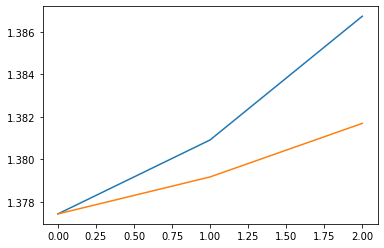

loss: 1.386730  [   64/29207]
Epoch Loss: 1.381694
Validation


KeyboardInterrupt: 

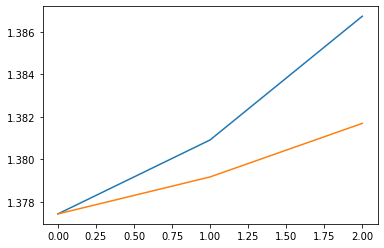

In [60]:
import matplotlib.pyplot as plt
import IPython
%matplotlib inline
pdsp_resnet_pt.train(plane2_net, loss_fn, optimizer, pd_data, plane2=True, validate=True, maxbatches=2, batchsize=32, epochs=2)

In [ ]:
pd_data.h5in['link0/plane_2_hits/integral'][0]


In [ ]:
out = plane2_net(torch.from_numpy(plane).float())

In [ ]:
out.shape

In [ ]:
pd_data.get_event(0)

In [ ]:
# pd_data.topos[0]

In [ ]:
target = torch.LongTensor([2])
target2 = torch.Tensor([[0., 0., 1., 0.]])

In [ ]:
loss_fn(out, target)

In [ ]:
loss_fn(out, target2)

In [ ]:
n_less = 0; n_more = 0;
for k, ne in pd_data.k_nevents.items():
    nt = pd_data.k_ntruths[k]
    if ne != nt:
        print(k, ne, nt)
        if ne < nt: n_more += 1
        elif ne > nt: n_less += 1

In [ ]:
n_less

In [ ]:
for x, y in pd_data.get_training_batches(batchsize=2, maxbatches=2):
    print(x.shape)
    print(y.shape)
for x, y in pd_data.get_training_batches(batchsize=2, maxbatches=2):
    print(x.shape)
    print(y.shape)

In [ ]:
pd_data.nevents - int(pd_data.nevents*.9)